# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3: Polynomial and LASSO Regression

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [2]:
from collections import Counter
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

%matplotlib inline

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS

- **THIS IS AN INDIVIDUAL ASSIGNMENT. Collaboration on this homework is NOT PERMITTED.**

- **THIS IS A TWO-WEEK HOMEWORK**. The material is indeed two-weeks-worth of work, so make sure you start it early!!!

- To submit your assignment follow the instructions given in Canvas.

- Please **restart the kernel and run the entire notebook again before you submit.**

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun your notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use `.head(...)` when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate and report $R^2$", do not just output the value from a cell. Write a `print(...)` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients for degree-5 polynomial model" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

- **Your code may also be evaluated for efficiency and clarity.** As a result, correct output is not always sufficient for full credit.

<hr style="height:2pt">

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data visualization [5 pts]**](#part1)
  - [Solutions](#part1solutions)


- [**Your Homework 3 roadmap**](#roadmap)


- [**Question 2: Guesstimate the polynomial relationship [14 pts]**](#part2)
  - [Solutions](#part2solutions)


- [**Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]**](#part3)
  - [Solutions](#part3solutions)


- [**Question 4: Finding the best model by k-fold cross validation [14 pts]**](#part4)
  - [Solutions](#part4solutions)


- [**Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]**](#part5)
  - [Solutions](#part5solutions)


- [**Question 6: Improving model consistency with LASSO regularization [33 pts]**](#part6)
  - [Solutions](#part6solutions)


- [**Question 7: Analyze your best test MSEs for each section of the homework [6 pts]**](#part7)
  - [Solutions](#part7solutions)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting percentage change in bacteria populations given their spreading factor

In this homework, we will explore polynomial regression for predicting a quantitative variable. Specifically, we will build regression models that can predict the percentage change in bacteria population after 4 hours based on their "spreading factor". These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population is positive, this indicates that the size of the bacteria population has grown. One important factor to note is that the percentage change could be negative. This indicates that within the specified time frame, the population of the bacteria has decreased from its original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file gives information about the change in percentage of the population and the second column contains the spreading factor of bacteria populations.


### Problem Description

We will predict the percentage change in population, given the spreading factor. For this exercise, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. We will explore several different approaches, with mean squared error ($MSE$) as an evaluative criteria, for finding the best fit and most robust polynomial regression for modeling this relationship.


<a id="part1"></a>

## <div class='exercise'>Question 1: Data visualization [5 pts]</div> 
    
[Return to contents](#contents)
    
**1.1** Generate a scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

**REMEMBER:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals that clearly communicate the data (as described in the [INSTRUCTIONS](#instructions) at the start of this notebook). Visuals should typically be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

**1.2** Based on the graph, is there any discernable relationship between the spreading factor and percentage change in population?

<a id="part1solutions"></a>

## Question 1: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**1.1** Generate a scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

**REMEMBER:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals that clearly communicate the data (as described in the [INSTRUCTIONS](#instructions) at the start of this notebook). Visuals should typically be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

</div>

In [3]:
# your code here

df_train = pd.read_csv("data/bacteria_train.csv")

# Extract x and y arrays from data frame for ease of use
# Also reshape x_train from 1D to 2D array to prevent sklearn errors when modeling
x_train = df_train["Spreading_factor"].values.reshape(-1,1)
y_train = df_train["Perc_population"].values

# Inspect our training dataframe for ease of reference
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Perc_population   423 non-null    float64
 1   Spreading_factor  423 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


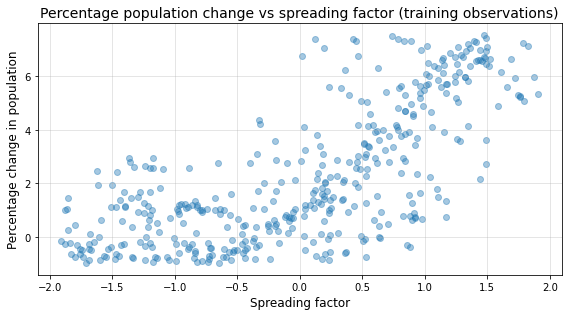

In [4]:
# your code here

plt.figure(figsize=(8, 4.5))
plt.scatter(x_train, y_train, alpha=0.4)
plt.xlabel("Spreading factor", fontsize=12)
plt.ylabel("Percentage change in population", fontsize=12)
plt.title(
    "Percentage population change vs spreading factor (training observations)", 
    fontsize=14,
)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show()

<div class='exercise-r'>

**1.2** Based on the graph, is there any discernable relationship between the spreading factor and percentage change in population?

</div>

*your answer here*

Though non-linear, there appears to be some relationship between the spreading factor and population change. As the spreading factor increases the population of the bacteria is also increasing. However, that rate of increase appears to change as the spreading factor changes, and may even decrease at more the extreme spreading factor values.

<a id="roadmap"></a>

<hr style='height:2px'> 

## Your Homework 3 roadmap

[Return to contents](#contents)

**We will be following this roadmap for Question 2 through Question 6:**

![](data/soln-roadmap.png)


<a id="part2"></a>

## <div class='exercise'>Question 2: Guesstimate the polynomial relationship [14 pts]</div> 

[Return to contents](#contents)


**2.1** Guesstimate the degree of the polynomial regression that may best fit the data given our observation of the data in Question 1, and then fit that model following the requirements outlined below:
- Create a single dictionary called `best_mse_dict` to store the best test $MSE$s for each type of model we will be building in this notebook. The keys of this dictionary will be the question number, and the values will be the $MSE$ values. So, for this question, you will have `best_mse_dict["2.1"] = ...` .

- Generate `PolynomialFeatures(...)` for your guesstimated degree and fit a polynomial regression using scikit-learn's `LinearRegression(...)` on the training set.
- Generate a plot with both the train and test data, as well as your prediction curve.
- Compute and print the $MSE$ on the test set and save that value to `best_mse_dict`.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.
  
**2.2** Now we will compute confidence intervals for the coefficients generated in our model. For the same degree polynomial regression fit above in 2.1, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:

- Report the coefficient values of the model fit above in 2.1.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data (you can limit your number of bootstraps to 100).
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**REMEMBER:** Bootstrapped samples should always be the same size as the original data and sampled with replacement.

<a id="part2solutions"></a>

## Question 2: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**2.1** Guesstimate the degree of the polynomial regression that may best fit the data given our observation of the data in Question 1, and then fit that model following the requirements outlined below:
- Create a single dictionary called `best_mse_dict` to store the best test $MSE$s for each type of model we will be building in this notebook. The keys of this dictionary will be the question number, and the values will be the $MSE$ values. So, for this question, you will have `best_mse_dict["2.1"] = ...` .

- Generate `PolynomialFeatures(...)` for your guesstimated degree and fit a polynomial regression using scikit-learn's `LinearRegression(...)` on the training set.
- Generate a plot with both the train and test data, as well as your prediction curve.
- Compute and print the $MSE$ on the test set and save that value to `best_mse_dict`.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.

</div>

In [5]:
# your code here 

# Read in our TEST dataset
df_test = pd.read_csv("data/bacteria_test.csv")
x_test = df_test["Spreading_factor"].values.reshape(-1,1)
y_test = df_test["Perc_population"].values

# Inspect to see the size of our test set and to confirm columns/dtypes
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Perc_population   108 non-null    float64
 1   Spreading_factor  108 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [6]:
# your code here 

# Make a global dictionary to save the
# test MSE values as required
best_mse_dict = {}

# Guesstimate degree of the curve
best_deg = 3

# PLEASE NOTE: One of the below parameters must always be False
# with the other True
# - For linear regression, it doesn't matter which is which.
# - What is important is that you don't fit an intercept while also
#   providing a bias column in your design matrix. It needs to be
#   one OR the other.
# - Try flipping these to the opposite designations True and False
#   and note that there will be no difference in your results.
# - Then, try setting BOTH to True or BOTH to False (both of which
#   would be incorrect) and see that it does change your results.
include_bias = False
fit_intercept = True

# Compute the polynomial features
x_poly_train = PolynomialFeatures(
    best_deg, include_bias=include_bias
).fit_transform(x_train)

x_poly_test = PolynomialFeatures(
    best_deg, include_bias=include_bias
).fit_transform(x_test)

# Fit a linear regression model
linreg = LinearRegression(fit_intercept=fit_intercept)
linreg = linreg.fit(x_poly_train, y_train)

In [7]:
# your code here

# Define a plotting function for re-use in each section
# of this homework
def plot_predictions(df_train, df_test=None, pred_train=None, title=None):
    """Plot data and regression curve
    
    .. note:: 
       This function was written for re-use in each section
       of this homework. This function generates a plot to
       meet repetitive plotting requirements to show both our 
       train and our test data plotted against a regression curve. 
    
    :param df_train: pd.DataFrame, training data X and y values
    :param df_test: pd.DataFrame, test data X and y values
                    (optional, default is None)
    :param pred_train: array, 1D array of train predictions
                      (optional, default is None)
    :param title: str, title text for resulting plot
                  (optional, default is None)
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(
        df_train.iloc[:,1], df_train.iloc[:,0], alpha=0.4, label="Train"
    )
    
    if df_test is not None:
        plt.scatter(
            df_test.iloc[:,1],
            df_test.iloc[:,0],
            marker="^",
            edgecolor="k",
            alpha=0.7,
            label="Test",
        )
    
    if pred_train is not None:
        sorted_lists = sorted(
            zip(df_train.iloc[:,1].values, pred_train)
        )
        sorted_x_train, sorted_y_pred_train = list(
            zip(*sorted_lists)
        )

        plt.plot(
            sorted_x_train,
            sorted_y_pred_train,
            linewidth=2,
            color="k",
            label = "Regression curve",
        )
        
    plt.xlabel("Spreading factor", fontsize=12)
    plt.ylabel("Percentage change in population", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(":", alpha=0.4)
    plt.tight_layout()
    plt.show()

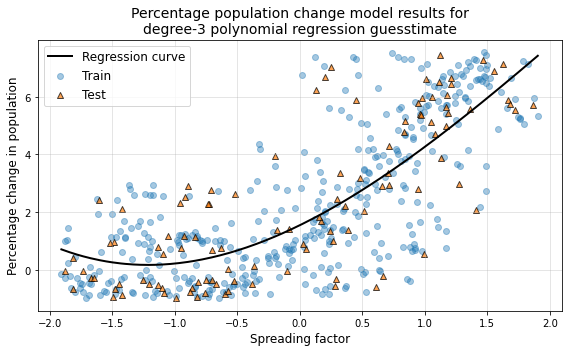

MSE for our guesstimated degree-3 model is:

	Train	2.6534
	Test	2.6519



In [8]:
# your code here

# Generate predictions
y_train_pred = linreg.predict(x_poly_train)
y_test_pred = linreg.predict(x_poly_test)

# Generate our plot showing our data and regression curve
title = (
    "Percentage population change model results for\n"
    "degree-{} polynomial regression guesstimate".format(best_deg)
)
plot_predictions(df_train, df_test, y_train_pred, title)

# Calculate and report train and test MSE
mse_train =  mean_squared_error(y_train, y_train_pred)
mse_test =  mean_squared_error(y_test, y_test_pred)

print(
    f"MSE for our guesstimated degree-{best_deg} model is:\n\n"
    f"\tTrain\t{mse_train:.4f}\n"
    f"\tTest\t{mse_test:.4f}\n"
)

# Save our test MSE to our dictionary as required
best_mse_dict["2.1"] = mse_test


**INTERPRETATION:**

*your answer here*

Based on the scatterplot of our training data shown in Question 1.1, we see what could possibly be a degree-3 (i.e. cubic) polynomial relationship between "spreading factor" and "percentage change". The general trend of the data, from left to right, starts out relatively flat and then appears to increase at an increasing rate until it reaches an inflection point at approximately $x=0.5$. The rate of increase then slows until it plateaus at approximately $x=1.5$ and then begins to decrease. Our best guesstimate is that a degree-3 polynomial regression curve might be well suited for modeling this relationsip.

Unfortunately, after fitting our degree-3 polynomial, the resulting regression curve appears to be insufficiently expressive for following the shape of our data. In order to minimize least squares when fitting to our degree-3 polynomial training data, the regression curve only loosely passes through the central mass of our data at approximately $x=0.5$. Our regression curve appears to exhibit a much more shallow curvature than that of the actual data.

These results lead us to believe that a higher-order polynomial will be required to provide the flexibility needed to more accurately model this relationship. However, when selecting a higher-order polynomial, we will want to take steps to help ensure we have a model that still generalizes well to unseen data does not overfit to our training data. For the remaining sections of this notebook, we demonstrate various approaches to taking such steps.

<br>
<br>
<a id="sol2note"></a>


**SOLUTION NOTE ON `fit_intercept`:**

**When using scikit-learn to both generate our polynomial features (using `PolynomialFeatures(...)`) and fit our linear regression model (using `LinearRegression(...)`), we need to take special care to ensure we do not fit two bias terms in our model.** As can be seen in the coded solution above, we explicitly set our `include_bias` argument for `PolynomialFeatures(...)` as well as our `fit_intercept` argument for `LinearRegression(...)`. As was described in Lecture and Lab, if you include a bias column (i.e. column of 1's) in your polynomial features $X$ design matrix, then you need to ensure that your scikit-learn regression model DOES NOT ALSO explicitly fit an intercept. This is because the coefficient for your bias column will effectively act as your intercept instead. Failing to set `fit_intercept=False` in such a case would mean that your model will, in effect, contain 2 perfectly correlated predictors.

For ordinary least squares (OLS) linear regression with polynomial features (which is what we implement in Questions 2, 3, 4, and 5), it does not matter which way you set each of these arguments AS LONG AS they are set opposite from one another (i.e. one is `True` and the other is `False`). However, this freedom to choose one vs. the other ONLY really exists for OLS regression. In Question 6, where we fit $LASSO$ regularized linear regression, you will always want to ensure you set `include_bias=False` and `fit_intercept=True` for the reasons we outline in the [Question 6.1 "SOLUTION NOTE"](#sol6note).

<div class='exercise-r'>

**2.2** Now we will compute confidence intervals for the coefficients generated in our model. For the same degree polynomial regression fit above in 2.1, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:

- Report the coefficient values of the model fit above in 2.1.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data (you can limit your number of bootstraps to 100).
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**REMEMBER:** Bootstrapped samples should always be the same size as the original data and sampled with replacement.

</div>

In [9]:
# your code here

# create empty list for storing coefficients
bootstrap = []

# set number of bootstraps
numboot = 100

# set seed for reproducible results
np.random.seed(109)

# Perform bootstraps as required
for i in range(numboot):
    df_boot = df_train.sample(frac=1, replace=True)
    x_poly_train = PolynomialFeatures(
        best_deg, include_bias=include_bias
    ).fit_transform(df_boot["Spreading_factor"].values.reshape(-1, 1))
    y_train_boot = df_boot.Perc_population
    linreg_boot = LinearRegression(fit_intercept=fit_intercept)
    linreg_boot.fit(x_poly_train, y_train_boot)
    if fit_intercept==True:
        bootstrap.append([linreg_boot.intercept_, *linreg_boot.coef_])
    else:
        bootstrap.append(linreg_boot.coef_)

# Convert bootstrap list of lists to numpy array
# for ease of use when plotting
bootstrap = np.array(bootstrap)

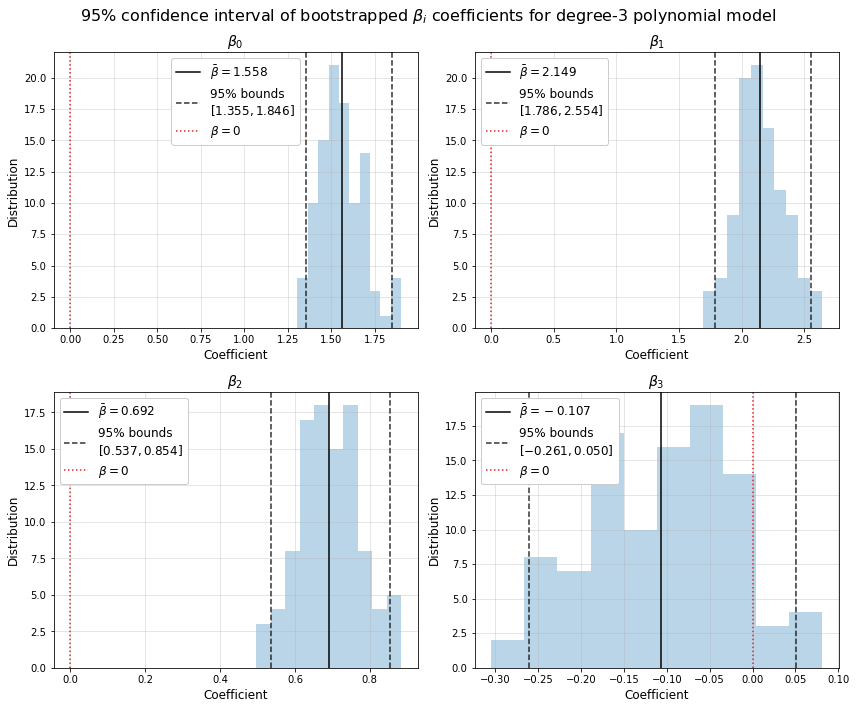


The coefficient values of the degree-3 polynomial regression model fit in Question 2.1 (without bootstrapping) were:

	Beta0	1.5450
	Beta1	2.1234
	Beta2	0.6942
	Beta3	-0.0986


In [10]:
# your code here 

fig, ax = plt.subplots(2,2, sharex=False, figsize = (12,10))

ax = ax.ravel()

for i in range(4):
    betavals = bootstrap[:,i]
    betavals.sort()

    x1 = np.percentile(betavals,2.5)
    x2 = np.percentile(betavals,97.5)
    xbar = np.mean(betavals)

    ax[i].hist(bootstrap[:,i], alpha=0.3)

    ax[i].axvline(
        xbar,
        color="k",
        linestyle="-",
        alpha=1,
        label="$\\bar{{\\beta}} = {:.3f}$".format(xbar),
    )
    ax[i].axvline(
        x1,
        color="k",
        linestyle="--",
        alpha=0.8,
        label="95% bounds\n$[{:.3f}, {:.3f}]$".format(x1, x2),
    )
    ax[i].axvline(x2, color="k", linestyle="--", alpha=0.8)
    ax[i].axvline(
        0,
        color="tab:red",
        linestyle=":",
        alpha=1,
        label="$\\beta=0$",
    )

    ax[i].set_ylabel("Distribution",fontsize=12)
    ax[i].set_xlabel("Coefficient",fontsize=12)
    ax[i].grid(":", alpha=0.4)
    ax[i].set_title(f"$\\beta_{i}$", fontsize=14)
    ax[i].legend(fontsize=12, framealpha=1)
    
#plt.xticks(fontsize=20)
fig.suptitle(
    "$95\%$ confidence interval of bootstrapped $\\beta_i$ "
    "coefficients for degree-{} polynomial model".format(best_deg),
    fontsize=16,
)
plt.tight_layout()
plt.show()

# your code here

print(
    f"\nThe coefficient values of the degree-{best_deg} "
    "polynomial regression model fit in Question "
    "2.1 (without bootstrapping) were:\n"
)

if fit_intercept==True:
    coefficients = [linreg.intercept_, *linreg.coef_]
else:
    coefficients = linreg.coef_
    
for i, coef in enumerate(coefficients):
    print(
        f"\tBeta{str(i)}\t{coef:.4f}"
    )

**INTERPRETATION:**

*your answer here*

Our bootstrapped confidence interval plots show mean $\beta_i$ values that are very similar to the corresponding $\beta_i$ values identified in our original degree-3 polynomial model trained in Question 2.1. The distribution of our bootstrapped values also appear roughly Normal around those means. These are both traits we would expect to see here. We would also expect these distributions to more closely approximate Normal as we further increase our number of bootstrapped samples.

**However, the most notable trait seen in our $\beta_i$ confidence intervals relates to each interval's relationship to $\beta=0$.** Ideally, in a regression model, we hope for coefficients that are clearly positive OR negative for each of our predictors. Such behavior helps us to know that the model has found evidence in support of a clear relationship among each predictor (relative to all other predictors) and our response variable. **In our bootstrapped results above, $\beta_0$, $\beta_1$, and $\beta_2$ all exhibit this desired behavior, as can be seen by $\beta_i=0$ being easily excluded from their $95\%$ CI bounds.** This tells us that, given this data, it is extremely unlikely that there is no relationship between our $x^0$, $x^1$, and $x^2$ (i.e. those degree-polynomial transformations of spreading factor) and our response variable $y$ (i.e. precentage change). **But, $\beta_3$ does not provide sufficient evidence to reject such a hypothesis, as can be seen by the inclusion of $\beta_3=0$ within our $95\%$ CI bounds.** Therefore, we cannot be confident of a relationship between our $x^3$ polynomial predictor and our response $y$ (while also taking all other predictors $x^0$, $x^1$, and $x^2$ into account).

**This is definitely interesting behavior for $\beta_3$, and not what we would necessarily expect given the visual relationship between spreading factor and percentage change observed in our plotted training data.** However, there are also limits to what can be done with a degree-3 polynomial, particularly when attempting to fit a least squares regression curve to such a transformation of $X$ (i.e. transforming it to $x^0$, $x^1$, $x^2$, and $x^3$). As we'll also see illustrated in our Question 6.2 and 6.3 implementations of $LASSO$ regularized regression, even at higher-order polynomials beyond cubic, not all polynomial-degrees included in a particular set of polynomial features are seen to show a significant relationship with our response variable.

<a id="part3"></a>

## <div class='exercise'>Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]</div> 

[Return to contents](#contents)

**3.1** Find the best degree polynomial relationship using a single validation set. Be certain to meet the requirements outlined below:

- Split your training data such that you separate out a single 20% validation split.
- Fit polynomial regression models up to **degree 30** on the 80% training set (one model for each degree polynomial regression).
- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Compare the validation $MSE$ values and select and report the degree for which the validation error is lowest.


**3.2** Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). Report the train and test $MSE$ and add the test $MSE$ to `best_mse_dict`.


**3.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

<a id="part3solutions"></a>

## Question 3: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**3.1** Find the best degree polynomial relationship using a single validation set. Be certain to meet the requirements outlined below:

- Split your training data such that you separate out a single 20% validation split.
- Fit polynomial regression models up to **degree 30** on the 80% training set (one model for each degree polynomial regression).
- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Compare the validation $MSE$ values and select and report the degree for which the validation error is lowest.

</div>

In [11]:
# your code here

# Perform train-validation split as required 
x_train80, x_val, y_train80, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=44
)

In [12]:
# your code here

# Set max degree and create lists for storing MSEs
max_degree = 30
train_mse = []
val_mse = []

include_bias = False
fit_intercept = True

for d in range(1,max_degree+1):
    x_poly_train = PolynomialFeatures(
        d, include_bias=include_bias
    ).fit_transform(x_train80)
    x_poly_val = PolynomialFeatures(
        d, include_bias=include_bias
    ).fit_transform(x_val)
    lin_reg = LinearRegression(fit_intercept=fit_intercept)
    lin_reg.fit(x_poly_train, y_train80)
    y_train_pred = lin_reg.predict(x_poly_train)
    y_val_pred = lin_reg.predict(x_poly_val)

    train_mse.append(mean_squared_error(y_train80,y_train_pred))
    val_mse.append(mean_squared_error(y_val,y_val_pred))

In [13]:
# your code here

# Define mse plotting function here that can be used throughout this notebook
# to plot all required MSE plots.
# This will save us from needlessly rewriting code, and will minimize the amount
# of code we need to debug or check for errors.

def mse_plot(
    var_list,
    train_score,
    val_score,
    val_std=None,
    title=None,
    x_label=None,
    loc="best",
    log_mse=False,
    log_xscale=False,
):
    """Generate plot for train and validation MSE values
    
    This function generates a train and validation MSE plot with
    options to add +/-1 standard deviation validation bounds, and
    to log scale either axis to improve plot interpretability
    if needed.
    
    :param var_list: list or array, values for x-axis tick labels 
    :param train_score: list or array, training mse values
    :param val_score: list or array, validation mse values
    :param val_std: list or array, validation std mse values used
                    to plot +/-1 standard deviation bounds
                    (optional, default is None)
    :param title: str, plot title (optional, default is None)
    :param x_label: str, x-axis label (optional, default is None)
    :param loc: int or "best", specifies position of legend
                (optional, default is "best")
    :param log_mse: bool, whether or not to log-scale MSE values
                    (optional, default is False)
    :param log_xscale: bool, whether or not to log-scale x-axis value
                       (optional, default is False)
    """
    fig, ax = plt.subplots(figsize=(9, 5))
    
    # Plot train and validation MSE values as lineplots
    ax.plot(
        var_list,
        train_score,
        "o--",
        label="Training",
        linewidth=2,
        alpha=0.4,
    )
    ax.plot(
        var_list,
        val_score,
        "^-",
        label="Validation",
        markeredgecolor="k",
        linewidth=2,
        alpha=0.7,
    )

    # Plot +/-1 standard deviation validation MSE bounds
    # Values are clipped at MSE=0 lower bound to keep values
    # within realm of reasonable MSE values (i.e. MSE cannot
    # realistically be negative)
    if val_std is not None:
        ax.fill_between(
            var_list, 
            np.clip(
                np.array(val_score)-val_std, a_min=0, a_max=None
            ),
            np.array(val_score)+val_std,
            color="tab:orange",
            alpha=0.2,
            label = "Validation +/-1 standard deviation")

    # Plot x-axis in log-scale if specified, this option is used in
    # Q6 to provide a more easily read set of alpha value ticks
    if log_xscale:
        ax.set_xscale("log")
    
    # Plot y-axis (i.e. MSE) in log-scale if specified, this option is
    # used in Q4 in an attempt to make MSE lines easier to see
    if log_mse:
        ax.set_yscale("log")
        ax.set_ylabel("$MSE$ (log scaled)", fontsize=12)
    else:
        ax.set_ylabel("$MSE$", fontsize=12)

        
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_title(title, fontsize= 14)
    ax.legend(loc=loc, fontsize =12)
    ax.set_xticks(var_list)
    plt.grid(":", alpha=0.4)
    plt.tight_layout()
    plt.show()

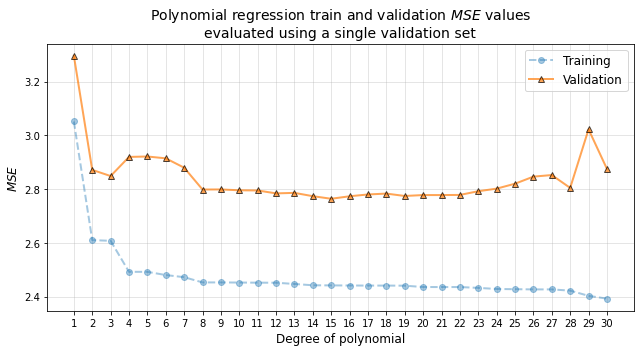


The best model has a degree of 15 with a training MSE of 2.4418 and a validation MSE of 2.7643


In [14]:
# your code here

# Generate required MSE plot using mse_plot function
x_label = "Degree of polynomial"
title = (
    "Polynomial regression train and validation $MSE$ values\n"
    "evaluated using a single validation set"
)

mse_plot(
    var_list=list(range(1, max_degree+1)),
    train_score=train_mse,
    val_score=val_mse,
    title=title,
    x_label=x_label,
)

# Print the validation MSE along with the degree of the best model. 
# To do this find the degree that gives the lowest MSE. 

best_deg = val_mse.index(min(val_mse))+1

print(
    f"\nThe best model has a degree of {best_deg} "
    f"with a training MSE of {train_mse[best_deg-1]:.4f}"
    f" and a validation MSE of {min(val_mse):.4f}"
)

<div class='exercise-r'>

**3.2** Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). Report the train and test $MSE$ and add the test $MSE$ to `best_mse_dict`.

</div>

In [15]:
# your code here

#Compute the polynomial features for best degree
x_poly_train = PolynomialFeatures(
    best_deg, include_bias=include_bias
).fit_transform(x_train)
x_poly_test = PolynomialFeatures(
    best_deg, include_bias=include_bias
).fit_transform(x_test)

# Fit a linear regression model on entire train set
linreg = LinearRegression(fit_intercept=fit_intercept)
linreg.fit(x_poly_train, y_train)

# Generate predictions
y_train_pred = linreg.predict(x_poly_train)
y_test_pred = linreg.predict(x_poly_test)

# Calculate and report train and test MSE
mse_train =  mean_squared_error(y_train, y_train_pred)
mse_test =  mean_squared_error(y_test, y_test_pred)

print(
    f"MSE for our degree-{best_deg} best model fit to "
    f"the entire training set is:\n\n"
    f"\tTrain\t{mse_train:.4f}\n"
    f"\tTest\t{mse_test:.4f}\n"
)

# Save test MSE to results dictionary as required 
best_mse_dict["3.2"] = mse_test

MSE for our degree-15 best model fit to the entire training set is:

	Train	2.4909
	Test	2.7365



<div class='exercise-r'>

**3.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

</div>

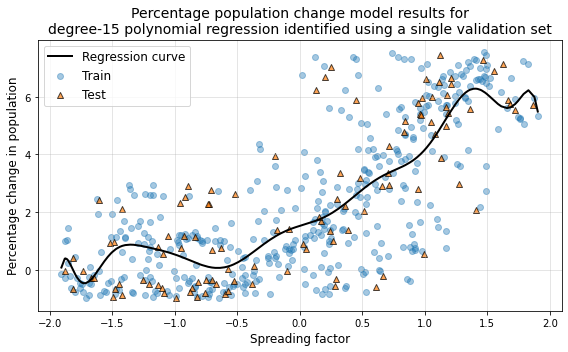

In [16]:
# your code here

title = (
    "Percentage population change model results for\n"
    "degree-{} polynomial regression identified using a "
    "single validation set".format(best_deg)
)
plot_predictions(df_train, df_test, y_train_pred, title)

**INTERPRETATION:**

*your answer here*

In our plot above, we can see that our higher-order polynomial regression of degree-15 fits to the general trend of our training data more closely than the degree-3 regression curve from Question 2. However, it also appears that this degree-15 model results in a higher test $MSE$ than our prior degree-3 model.

While we observed in Question 2 that our degree-3 polynomial regression had under-fit to our data, here the additional flexibility of our degree-15 model has led to increased variance in our model, indicating we have begun to overfit to our training data (our training $MSE$ has decreased, while our test $MSE$ has increased). This has resulted in a model that will likely generalize less well to new unseen data. Instead of just fitting to the general trend observed in the training data, the degree-15 curve appears to have also begun fitting to some of the noise in that data, particularly at the more extreme values of $X$.

Ultimately, we may want to give consideration to the outsized role that random variability in our single train-validation split might play in the selection of our "best degree" here. More on this is included in our written solution for Question 4.3. But, for the time being, we can investigate this effect by changing the random state of our train-validation split in the Question 3.1 code above and observe how that affects our $MSE$ plot and resulting "best degree".

<a id="part4"></a>

## <div class='exercise'>Question 4: Finding the best model by k-fold cross validation [14 pts]</div> 

[Return to contents](#contents)

**4.1** In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation on the `bacteria_train.csv` dataset.

- Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values. Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.1 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

**4.2** Fit the best model on the entire training data and report the $MSE$.

- For the best degree polynomial regression identified in Question 4.1 above, train on the complete training set from the `bacteria_train.csv` file and predict on the test data.
- Report the coefficients of the model.
- Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.


**4.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).


<a id="part4solutions"></a>

## Question 4: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**4.1** In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation on the `bacteria_train.csv` dataset.

- Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values. Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.1 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

</div>

In [17]:
# your code here

max_degree = 30
degree = max_degree

include_bias = False
fit_intercept = True

train_score = []
validation_score = []
validation_std = []

for d in range(1,degree+1):
    x_poly_train = PolynomialFeatures(
        d, include_bias=include_bias
    ).fit_transform(x_train)
    lin_reg = LinearRegression(fit_intercept=fit_intercept)
    mse_score = cross_validate(
        lin_reg,
        x_poly_train,
        y_train,
        cv=10,
        scoring="neg_mean_squared_error",
        return_train_score=True,
    )
    train_score.append(np.mean(-mse_score["train_score"]))
    validation_score.append(np.mean(-mse_score["test_score"]))
    validation_std.append(np.std(mse_score["test_score"]))

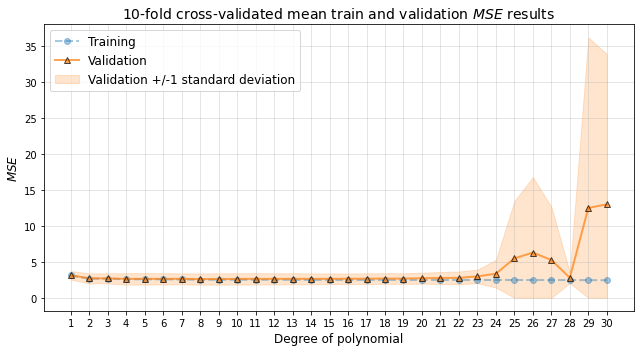

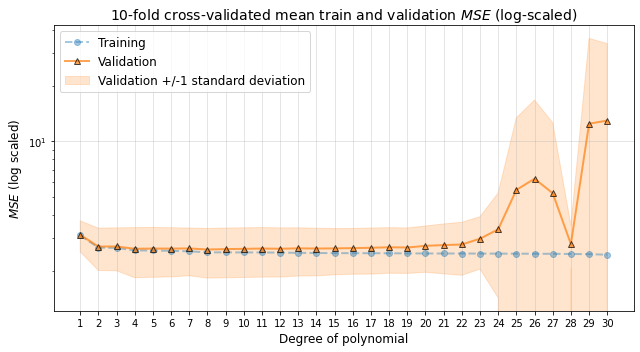


The best model has a degree of 8 with a training MSE of 2.5081 and a validation MSE of 2.5991


In [18]:
# your code here

x_label = "Degree of polynomial"
title = (
    "10-fold cross-validated mean train and validation $MSE$ results"
)

mse_plot(
    var_list=list(range(1, max_degree+1)),
    train_score=train_score,
    val_score=validation_score,
    val_std=validation_std,
    title=title,
    x_label=x_label,
    loc=2,
    log_mse=False,
)

x_label = "Degree of polynomial"
title = (
    "10-fold cross-validated mean train and validation $MSE$ (log-scaled)"
)

mse_plot(
    var_list=list(range(1, max_degree+1)),
    train_score=train_score,
    val_score=validation_score,
    val_std=validation_std,
    title=title,
    x_label=x_label,
    loc=2,
    log_mse=True,
)

best_deg = validation_score.index(min(validation_score))+1

print(
    f"\nThe best model has a degree of {best_deg} "
    f"with a training MSE of {train_score[best_deg-1]:.4f}"
    f" and a validation MSE of {min(validation_score):.4f}"
)

**INTERPRETATION:**

*your answer here*

**The above $MSE$ plots agree with our understanding of polynomial regression.** The behavior of the polynomial is going to become more extreme and more overfit to the training data as the degree-number grows very large. This is exhibited by the increase in mean validation $MSE$ following an initial decrease, while the mean training $MSE$ simply continues to decrease as the degree-number grows.

**Likewise, we also expect to see an increasing variability among our validation $MSE$ values as the degree-number grows large.** This is exhibited by our widening +/-1 standard deviation bounds. As our polynomial model increases in flexibility, the variance of our validation $MSE$ values increase across our $k$-fold splits while performing cross-validation. This can be attributed to the increasingly extreme behavior of the higher-order polynomials as they overfit in varying ways to each of the $k$-fold training splits.

**The one thing that is surprising in the above plot, is the strange (and abrupt) decrease in both mean and variance for our degree-28 validation $MSE$.** This appears to be something unique about the degree-28 polynomial's relationship to this particular dataset. But, even with this sudden improvement in fit at degree-28, we still have a better "best degree" at a much lower-order polynomial (i.e. degree-8). 

<div class='exercise-r'>

**4.2** Fit the best model on the entire training data and report the $MSE$.

- For the best degree polynomial regression identified in Question 4.1 above, train on the complete training set from the `bacteria_train.csv` file and predict on the test data.
- Report the coefficients of the model.
- Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

</div>

In [19]:
# your code here

#Compute the polynomial features for best degree
x_poly_train = PolynomialFeatures(
    best_deg, include_bias=include_bias
).fit_transform(x_train)
x_poly_test = PolynomialFeatures(
    best_deg, include_bias=include_bias
).fit_transform(x_test)

# Fit a linear regression model
linreg = LinearRegression(fit_intercept=fit_intercept)
linreg.fit(x_poly_train, y_train)

# Generate predictions
y_train_pred = linreg.predict(x_poly_train)
y_test_pred = linreg.predict(x_poly_test)

# Calculate and report train and test MSE
mse_train =  mean_squared_error(y_train, y_train_pred)
mse_test =  mean_squared_error(y_test, y_test_pred)

print(
    f"MSE for our degree-{best_deg} best model fit to "
    f"the entire training set is:\n\n"
    f"\tTrain\t{mse_train:.4f}\n"
    f"\tTest\t{mse_test:.4f}\n"
)

# Save test MSE to results dictionary as required 
best_mse_dict["4.2"] = mse_test

# Report coefficients as required
print(
    f"Coefficients for this degree-{best_deg} polynomial"
    f" regression model are:\n"
)

if fit_intercept==True:
    coefficients = [linreg.intercept_, *linreg.coef_]
else:
    coefficients = linreg.coef_
    
for i, coef in enumerate(coefficients):
    print(
        f"\tBeta{str(i)}\t{coef:.4f}"
    )

MSE for our degree-8 best model fit to the entire training set is:

	Train	2.5125
	Test	2.6130

Coefficients for this degree-8 polynomial regression model are:

	Beta0	1.5353
	Beta1	2.5970
	Beta2	-1.0949
	Beta3	-1.1891
	Beta4	3.4831
	Beta5	0.6529
	Beta6	-1.7130
	Beta7	-0.1153
	Beta8	0.2404


<div class='exercise-r'>

**4.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).

</div>

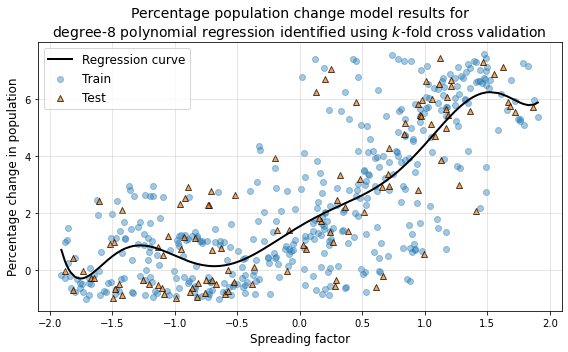

In [20]:
# your code here

title = (
    "Percentage population change model results for\n"
    "degree-{} polynomial regression identified using "
    "$k$-fold cross validation".format(best_deg)
)
plot_predictions(df_train, df_test, y_train_pred, title)

**INTERPRETATION:**

*your answer here*

Compared to our prior "best degree" fit from Question 3.1 (where we used a single train-validation split to select a "best" model of degree-15), our use of cross-validation in Question 4.1 has led to our selection of a less flexible lower-order degree-8 model. Inspecting our degree-8 polynomial regression curve above, we can see a slightly smoother curve than was observed with degree-15 in Question 3. **This degree-8 curve appears to be slightly less affected by the noise in our training data. As such, it appears to be less overfit than our degree-15 model, resulting in a lower overall test $MSE$.**

In addition, because this degree-8 model was selected using cross-validation rather than a single train-validation split, we would expect our selection process to be a bit more robust, meaning that we have reduced the effect of random variability on our selection procedure. **Whereas the random state of our single train-validation split in Question 3.1 can have a disproportionately large effect on our final "best degree" result, in cross-validation the addition of multiple $k$-folds and the averaging of validation results to identify our optimal hyperparameter $n$-degrees reduces the effect of random variability attributable to any single train-validation split.** Our hope is that by taking these additional steps, we will have increased our chances of selecting an optimal "best degree", such that the resulting model will generalize well to new data.

<a id="part5"></a>

## <div class='exercise'>Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]</div> 

[Return to contents](#contents)

**5.1** In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.2](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation. As before, we use the `bacteria_train.csv` data to train the model and `bacteria_test.csv` to test the model.

- Similar to Question 2.2, run **at least 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
  - Select the best cross-validated degree polynomial regression based on lowest mean validation $MSE$ and store that best degree to a list.
- After completing your bootstraps, you should have a list of "best degree" numbers, one degree for each completed bootstrap.
- Generate a bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the “best degree” numbers saved during your bootstraps.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

**5.2** What are your observations? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 

**5.3** Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

**5.4** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

<a id="part5solutions"></a>

## Question 5: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**5.1** In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.2](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation. As before, we use the `bacteria_train.csv` data to train the model and `bacteria_test.csv` to test the model.

- Similar to Question 2.2, run **at least 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
  - Select the best cross-validated degree polynomial regression based on lowest mean validation $MSE$ and store that best degree to a list.
- After completing your bootstraps, you should have a list of "best degree" numbers, one degree for each completed bootstrap.
- Generate a bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the “best degree” numbers saved during your bootstraps.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

</div>

In [21]:
%%time
# Use the `%% time` Jupyter magic, so we can easily
# see how long it took for this cell to execute

# your code here

# Set bootstrapping parameters
numboot = 100
max_deg = 30

include_bias = False
fit_intercept = True

# Create empty list for storing bootstrap best-degrees
deg_list = []

# Perform bootstraps
for i in range(numboot):
    df_boot = df_train.sample(frac=1,replace=True)
    mse_list = []
    for degree in range(1, max_deg+1):
        x_train_boot = df_boot[["Spreading_factor"]]
        x_poly_train = PolynomialFeatures(
            degree, include_bias=include_bias
        ).fit_transform(x_train_boot)
        y_train_boot = df_boot.Perc_population
        linreg_boot = LinearRegression(fit_intercept=fit_intercept)
        mse_score = cross_validate(
            linreg_boot, 
            x_poly_train, 
            y_train_boot,
            cv=10, 
            scoring="neg_mean_squared_error",
            return_train_score=True,
        )
        mean_mse = np.mean(-mse_score["test_score"])
        mse_list.append(mean_mse)
    deg_list.append(mse_list.index(min(mse_list))+1)

CPU times: user 3min 32s, sys: 2min 46s, total: 6min 19s
Wall time: 1min 56s


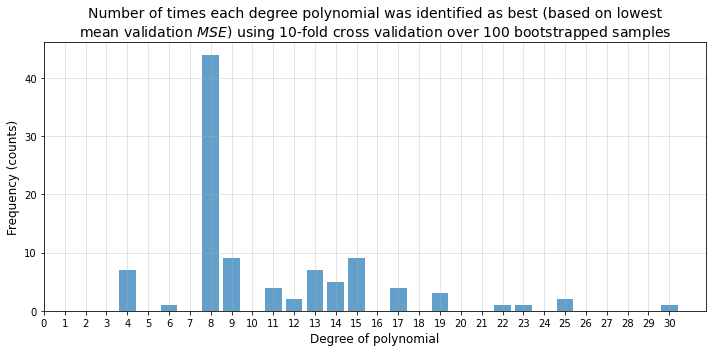

In [22]:
# your code here

# Here we use the Counter dict subclass from the Python standard
# library Collections module to simplify data manipulation:
# https://docs.python.org/3/library/collections.html#collections.Counter
c = Counter(deg_list)

# Generate barplot as required
fig,ax = plt.subplots(figsize=(10, 5))
ax.bar(c.keys(), c.values(), alpha=0.7)

ax.set_xticks(range(max_deg+1))
ax.set_xlabel(r"Degree of polynomial", fontsize=12)
ax.set_ylabel("Frequency (counts)", fontsize=12)
ax.set_title(
    "Number of times each degree polynomial was identified as best "
    "(based on lowest\nmean validation $MSE$) using 10-fold cross "
    f"validation over {numboot} bootstrapped samples",
    fontsize=14,
)

plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show()

<div class='exercise-r'>

**5.2** What are your observations? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 


</div>

*your answer here*

In our resulting plot above, we can see a large range of degree-values identified as "best" for at least one of our 100 bootstrapped iterations. However, even with all of this variation in our results, degree-8 stands out as having been identified as "best" for a clear plurality of our 100 boostraps (for more than 40% of our bootstraps). **This clear plurality presents an easy decision for us to choose degree-8 as our overall best degree.** In fact, even if this bootstrapping method didn't present as an extreme a plurality for a single degree-value as it has here, we would likely still choose the most frequently identified "best" degree value for our final selection. Such a decision would be supported by the results of our selection method.

**In regards to the variation in the "best degree" values identified over our bootstraps,** this result is not entirely surprising. Even though our bootstrapped samples are all drawn from the same underlying dataset, the random variability of this sampling process can still lead to large variances in our resulting bootstrapped training sets. Apparently, given the distribution of our original training data and the noise in that data, such sampling variances are sufficient to result in different "best degree" values being identified among our bootstraps. Irregardless, there is still a specific degree (i.e. degree-8) identified as "best" more frequently than all others.

<div class='exercise-r'>

**5.3** Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

</div>

In [23]:
# your code here

# Select the best degree from the above exercise
best_deg = c.most_common(1)[0][0]

#Compute the polynomial features for best degree
x_poly_train = PolynomialFeatures(
    best_deg, include_bias=include_bias
).fit_transform(x_train)
x_poly_test = PolynomialFeatures(
    best_deg, include_bias=include_bias
).fit_transform(x_test)

# Fit a linear regression model
linreg = LinearRegression(fit_intercept=fit_intercept)
linreg.fit(x_poly_train, y_train)

# Generate predictions
y_train_pred = linreg.predict(x_poly_train)
y_test_pred = linreg.predict(x_poly_test)

# Calculate and report train and test MSE
mse_train =  mean_squared_error(y_train, y_train_pred)
mse_test =  mean_squared_error(y_test, y_test_pred)

print(
    f"MSE for our degree-{best_deg} best model fit to "
    f"the entire training set is:\n\n"
    f"\tTrain\t{mse_train:.4f}\n"
    f"\tTest\t{mse_test:.4f}\n"
)

# Save test MSE to results dictionary as required 
best_mse_dict["5.3"] = mse_test

MSE for our degree-8 best model fit to the entire training set is:

	Train	2.5125
	Test	2.6130



<div class='exercise-r'>

**5.4** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

</div>

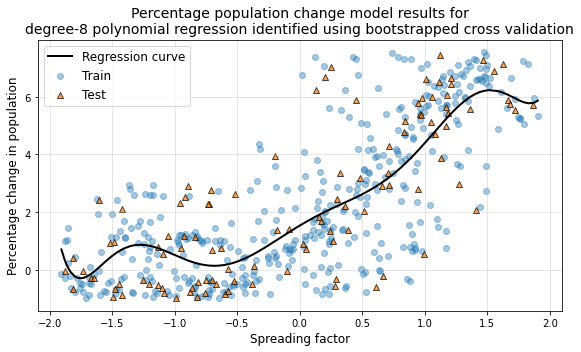

In [24]:
# your code here

title = (
    "Percentage population change model results for\n"
    "degree-{} polynomial regression identified using "
    "bootstrapped cross validation".format(best_deg)
)
plot_predictions(df_train, df_test, y_train_pred, title)

**INTERPRETATION:**

*your answer here*

**For both Question 4 and Question 5, we identified the same "best degree" values for our model (i.e. degree-8).** As such, our resulting best models are identical for both of these questions. This means that both have identical regression curves and identical $MSE$ values. **Therefore, one model is not necessarily better than the other, but it is our model selection methods that differ.**

**Much in the same way that we had characterized our Question 4 model selection method as being "more robust" than our Question 3 model selection method, we can think of our Question 5 selection method as being more robust than our Question 4 method.** Even though the final resulting model is identical to Question 4, we can think of this Question 5 model selection method as further mitigating the effects of random variability in our results. Not only do we employ $k$-fold cross-validation here to reduce the effect of random variability in our train-validation splits, but we also employ bootstrap sampling to perform cross-validation on 100 "simulated" datasets drawn from our actual training data. Even with this simulation of new training sets via bootstrapping, degree-8 is still shown to be the "best degree" for modeling our relationship between the predictor "spreading factor" and the response "percentage change".

<a id="part6"></a>

## <div class='exercise'>Question 6: Improving model consistency with LASSO regularization [33 pts]</div> 

[Return to contents](#contents)

In the previous sections, we compared many polynomial models to find the best degree. For each model of degree $n$, we considered all polynomial coefficients *up to* **degree $n$** using `PolynomialFeatures(...)`. In this section we will consider polynomial features of $n=30$, and a **best model** that could be chosen from any possible combination of our 30 degrees.

For instance, we could choose a best model with an arbitrary set of polynomial degrees up degree 30, such as $x^i \in [x^1, x^5, x^{19}, x^{24}]$, rather than the standard approach of using *all* consecutive degrees up to our maximum degree $n=30$ as in $x^i \in [x^0, x^1, ... , x^{30}]$.

However, the total number of such possible models for $n=30$ is $2^{30}\approx10^9$, and searching through all of them would be laborious and computationally inefficient. Instead, we can use $LASSO$ (i.e. $L1$) regularization, which "switches off" highly unstable degree coefficients by shrinking them to zero (or very close to zero), thus giving us an efficient solution to this particular combinatorial challenge.

**6.1 Find the best hyper-parameter alpha, $\alpha$**

First, we will use cross validation to find the the best regularization parameter $\alpha$. As before, we use the `bacteria_train.csv` for cross validation.

- Use polynomial features with **degree 30**. 
- For each regularization parameter $\alpha$ in $\alpha \in [10^{-3}, 10^{-2}, 10^{-1}, 10^{0}, 10^{1}]$, perform scikit-learn's `Lasso(...)` regression using `cross_validate(...)` with `k=10`.
- Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.
- Generate a single plot showing the mean train and validation $MSE$ values for each regularization parameter $\alpha$, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Print the best $\alpha$ value, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.
- Did your $LASSO$ regression model generate any warnings while solving this problem? If so, what was that warning, what did it mean, what steps did you take to address the cause of this warning, and why might it be important to take those steps? (See the [NOTE](#part6note) at the bottom of Question 6 for some hints.)


**6.2 Find the most significant degrees**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.


**6.3 Compute and print the test $MSE$**

From our Question 6.2 results, we can see that only some degrees are consistently significant over many bootstraps. You will now retrain the $L1$ regularized model on the entire **training** data and find the test $MSE$.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.2 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)).
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $).
- Report the train and test $MSE$ and save the test $MSE$ to `best_mse_dict`.

**6.4 What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.3 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.3 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.3 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?

<a id="part6note"></a>

**NOTE:**
- Once complete, your code for 6.1 and 6.2 will likely take several minutes to execute. This is to be expected.
- You will also likely receive `ConvergenceWarning` messages as your $LASSO$ regression models are trained.
  - Try resolving this warning by increasing your $LASSO$ models' maximum iterations by between 20-times to 100-times greater than scikit-learn's default number of iterations for its `Lasso(...)` implementation.
  - If that fails to resolve this warning, feel free to also uncomment the [IPython cell magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-capture) provided at the top the code cell (i.e. `%%capture --no-stdout --no-display`) to silence the warning.
  - Please note that using a `%%capture` cell magic such as this is a good alternative to using Python's native `warnings.filterwarnings(...)` when working in a Jupyter notebook, because it helps to ensure you don't accidentally silence important warnings in other parts of your notebook.


<a id="part6solutions"></a>

## Question 6: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**6.1 Find the best hyper-parameter alpha, $\alpha$**

First, we will use cross validation to find the the best regularization parameter $\alpha$. As before, we use the `bacteria_train.csv` for cross validation.

- Use polynomial features with **degree 30**. 
- For each regularization parameter $\alpha$ in $\alpha \in [10^{-3}, 10^{-2}, 10^{-1}, 10^{0}, 10^{1}]$, perform scikit-learn's `Lasso(...)` regression using `cross_validate(...)` with `k=10`.
- Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.
- Generate a single plot showing the mean train and validation $MSE$ values for each regularization parameter $\alpha$, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Print the best $\alpha$ value, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.
- Did your $LASSO$ regression model generate any warnings while solving this problem? If so, what was that warning, what did it mean, what steps did you take to address the cause of this warning, and why might it be important to take those steps? (See the [NOTE](#part6note) at the bottom of Question 6 for some hints.)

</div>

In [25]:
%%time
%%capture --no-stdout --no-display

# your code here

# Set parameters for cross-validation
alpha_list = [1e-3, 1e-2, 1e-1, 1, 1e1]
max_degree = 30

# Unlike prior models where we simply used OLS regression
# to fit our models, because we are using regularized
# regression here, WE MUST BE CERTAIN to set include_bias
# to False and fit_intercept to True here for the reasons
# outlined in the Q6.1 SOLUTION NOTE below.
include_bias = False
fit_intercept = True

# Increase our LASSO max_iters as described in our written
# interpretation below
max_iter = 100000

# Create empty lists for storing results
mse_list = []

train_score = []
validation_score = []
validation_std = []

for alpha in alpha_list:

    x_poly_train = PolynomialFeatures(
        max_degree, include_bias=include_bias
    ).fit_transform(x_train)
    lasso = Lasso(
        fit_intercept=fit_intercept, alpha=alpha, max_iter=max_iter
    )
    mse_score = cross_validate(
        lasso,
        x_poly_train, 
        y_train,
        cv=10, 
        scoring="neg_mean_squared_error",
        return_train_score=True,
    )

    train_score.append(
        np.mean(-mse_score["train_score"])
    )
    validation_score.append(
        np.mean(-mse_score["test_score"])
    )
    validation_std.append(
        np.std(mse_score["test_score"])
    )

CPU times: user 5min 19s, sys: 6min, total: 11min 20s
Wall time: 1min 36s


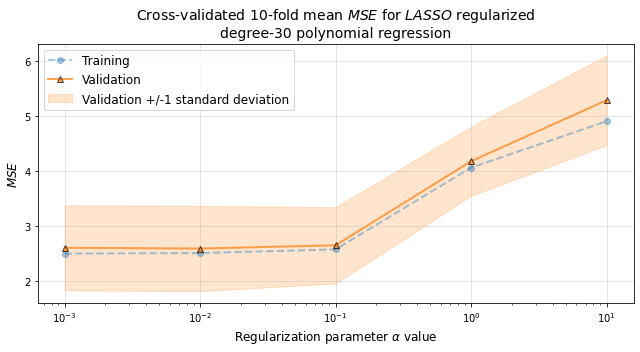

The results from our degree-30 cross-validated LASSO regression are:

	Best Alpha	0.01

	Train MSE	2.5038
	Validation MSE	2.5864



In [26]:
# your code here

# Generate MSE plot as required
x_label = "Regularization parameter $\\alpha$ value"
title = (
    "Cross-validated 10-fold mean $MSE$ for $LASSO$ regularized\n"
    "degree-{} polynomial regression".format(max_degree)
)

mse_plot(
    var_list=alpha_list,
    train_score=train_score,
    val_score=validation_score,
    val_std=validation_std,
    title=title,
    x_label=x_label,
    loc=2,
    log_xscale=True,
)

# Print best alpha and corresponding MSE results
best_validation_mse = min(validation_score)
best_mse_idx = validation_score.index(best_validation_mse)

best_alpha = alpha_list[best_mse_idx]

best_alpha_train_mse = train_score[best_mse_idx]


print(
    f"The results from our degree-{max_degree} "
    "cross-validated LASSO regression are:\n\n"
    f"\tBest Alpha\t{best_alpha}\n\n"
    f"\tTrain MSE\t{best_alpha_train_mse:.4f}\n"
    f"\tValidation MSE\t{best_validation_mse:.4f}\n"
)

**INTERPRETATION:**

*your answer here*

**While performing $LASSO$ regression here, scikit-learn generated a `ConvergenceWarning`, informing us that our $LASSO$ algorithm did not converge. Unlike ordinary least squares (OLS) regression or the other regularized regression method we learned in this course (i.e. $RIDGE$), $LASSO$ regression DOES NOT have a closed-form solution.** Therefore, the solution to $LASSO$ regression is identified iteratively until the algorithm converges to some predefined threshold. If we inspect the official scikit-learn documentation for the `Lasso(...)` model class (or similarly the `LassoCV(...)` model class), we can see that the default arguments for number of iterations is `max_iter=1000` and optimization tolerance (i.e. our threshold for convergence) is `tol=1e-4`.

**Although $LASSO$ regression is never guaranteed to converge, we do want to do our best to ensure as optimal a solution (i.e. as optimal a model) as possible is identified by our algorithm.**

**This raises questions for us to consider while trying to determine what action to take to address this `ConvergenceWarning` message. Often, our answers to these questions may be context dependent based on the tasks we are trying to perform or objectives we are trying to reach.** For instance, is **increasing our number of maximum iterations** sufficient for our $LASSO$ algorithm to achieve convergence? If so, is it just a matter of increasing our iterations to a very, very, very large number? Is increasing our number of max iterations to such a large number **even computationally feasible** under our particular circumstances? Likewise, could we simply achieve convergence by **increasing our optimization tolerance**? If we do increase that tolerance and it does then converge, we haven't actually done anything to increase the chances of our model actually reaching an optimal solution. Instead, we have just lowered the bar for convergence to say that we are willing to accept a less stringent threshold prior to ceasing our iterations. Perhaps this is fine in some circumstances, but is **typically not** what we want to do if we care about finding an optimal (or near to optimal as possible) solution.

Another thing to consider is that we have neither **normalized** nor **standardized** our degree-30 polynomial $X$ data. Doing so may potentially improve the ability of our $LASSO$ model to converge. But, we have chosen not to do so here. For the purpose of Homework 3, not only does normalizing the data not have a significant effect on our results with this particular dataset, but more importantly, it makes it difficult for us to draw a direct comparison between our Question 6 $LASSO$ results and our earlier OLS model results in Questions 1 through 5.

**Here, we have simply chosen to address our `ConvergenceWarning` by increasing our number of maximum interations by 20- to 100-times beyond the `max_iter` default argument. This still allows our Question 6 computational workload to execute within a reasonable amount of time, and it hopefully allows our algorithm the time it needs to find a "more optimal" solution than it might otherwise have found with only $1,000$ iterations.**

<br>
<br>
<a id="sol6note"></a>

**SOLUTION NOTE ON $LASSO$ `fit_intercept`:**

In our prior ["SOLUTION NOTE" in Q2.1](#sol2note), we discussed the importance of NOT BOTH including a bias column in your $X$ design matrix AND fitting an intercept. And, we noted that with ordinary least squares (OLS) regression we could do either one of these things AS LONG AS we did not do the other. 

**However, now that we are performing regularized regression in Question 6, we want to take great care in ensuring that we DO NOT accidentally regularize our intercept coefficient.** To ensure that the intercept term is not regularized, when using scikit-learn, we need to make certain to set `include_bias=False` when generating our polynomial features, and we need to make certain to set `fit_intercept=True` when performing $LASSO$ regression (the same would also apply if we were fitting $RIDGE$ regression instead). Recall that the formula for $LASSO$ regression is:

$$ \mathcal{L}_{LASSO} = \frac{1}{n} \sum_{i}^n\left| y_i - \beta^T x_i \right|^2 + \lambda \sum_{j=1}^J \left| \beta_j\right|$$

As can be seen in the $j=1$ of the second term, the intercept (i.e. bias term) $\beta_0$ should not be regularized. This is because $\beta_0$ it is not directly connected to the predictors $X$. Unfortunately, the ONLY way to ensure this does not happen when using scikit-learn's $LASSO$ implementation, is to set `fit_intercept=True`. Otherwise, if a bias column is instead provided as part of our design matrix (as is done by default when using `PolynomialFeatures(...)`), and we set `fit_intercept=False`, scikit-learn will treat $\beta_0$ the same as any other $\beta_i$ coefficient and regularize it. On the other hand, if we set `include_bias=False` and `fit_intercept=True`, scikit-learn will explicitly set an intercept $\beta_0$ and it will NOT apply regularization to that $\beta_0$.

**Therefore, the correct approach when fitting $LASSO$ or $RIDGE$ regularized regression in scikit-learn is to set `include_bias=False` and `fit_intercept=True`.**

<div class='exercise-r'>

**6.2 Find the most significant degrees**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.

</div>

In [27]:
%%time
%%capture --no-stdout --no-display

# your code here

# Set bootstrapping parameters
numboot = 100

# Create empty dictionary for storing results
significant_degrees = {}

# Perform bootstraps
for i in range(numboot):
    df_boot = df_train.sample(frac=1, replace=True)
    x_train_boot = df_boot[["Spreading_factor"]]
    x_poly_train = PolynomialFeatures(
        max_degree, include_bias=include_bias
    ).fit_transform(x_train_boot)
    y_train_boot = df_boot.Perc_population

    lasso = Lasso(
        fit_intercept=fit_intercept,
        max_iter=max_iter,
        alpha=best_alpha,
    )
    lasso.fit(x_poly_train, y_train_boot)
    
    if fit_intercept==True:
        coefficients = [lasso.intercept_, *lasso.coef_]
    else:
        coefficients = lasso.coef_

    for i in np.where(np.abs(coefficients)>0.1)[0]:
        if i not in significant_degrees.keys():
            significant_degrees[i]=1
        else:
            significant_degrees[i]+=1

CPU times: user 12min 5s, sys: 13min 55s, total: 26min 1s
Wall time: 3min 48s


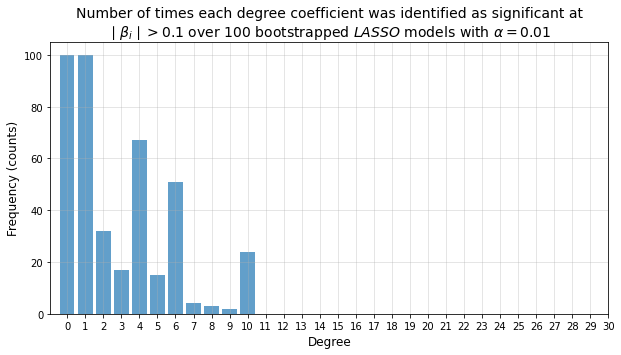

In [28]:
# your code here

fig, ax = plt.subplots(figsize=(10,5))

lists = sorted(significant_degrees.items())

x, y = zip(*lists)

ax.bar(x, y, alpha=0.7)
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("Frequency (counts)", fontsize=12)
ax.set_xticks(range(max_degree+1))
ax.set_title(
    "Number of times each degree coefficient was identified as significant at\n"
    f"$\mid\\beta_i\mid > 0.1$ over {numboot} bootstrapped $LASSO$ models "
    f"with $\\alpha={best_alpha}$",
    fontsize=14,
)
plt.grid(":", alpha=0.4)
plt.show()


**INTERPRETATION:**

*your answer here*

Based on the $\beta_i$ values generated by our degree-30 polynomial $LASSO$ regression models with $\alpha=0.01$ over these 100 boostraps, we can see that no degree greater than degree-10 was ever identified as significant at $\mid \beta_i\mid > 0.1$. This tells us that, after regularization, across 100 simulated training sets bootstrapped from our full training dataset, the coefficients for these degree predictors contributed so little to our each of our 100 fitted $LASSO$ models, that they never exceeded our minimum required threshold for significance. There is likely very little chance that our final model will benefit from including any degree polynomial of an order greater than 10.

**The more challenging decision (and one that is less straightforward than selecting the "best degree" in our prior model selection methods) is to determine whether we want to include up to the maximum degree for which any $\beta_i$ coefficients where identified as significant (i.e. degree-10), or whether we may want to exclude that degree polynomial and any of the ones before it.**

As we can see in the barplot above, we have several degrees exhibiting much higher frequency counts than the others (i.e. degrees 0, 1, 4, and 6). Then, after degree-6 (for which almost 60% of our bootstraps were identified as significant) the frequency counts drop to very low values (less than 10%) for degrees 7, 8, and 9. The count then increases for degree-10, albeit only to approximately 20%.

Here we can reason that, we may gain relatively little by choosing a maximum degree greater than degree-6 by virtue of how infrequently our bootstrapped models found those coefficients to be significant. In fact, the reason we may be seeing such a low number of those higher degree coefficients (degrees 7, 8, 9, and 10) as being significant, is that perhaps the noise in our data had led to those few bootstraps where the coefficients were found to be significant. If we were to include them, we may also be increasing our risk of overfitting to our training data. This is part of the trade-off for making our model any more complex or flexible than it needs to be. **For that reason, we are going to interpret our barplot above as sending a strong signal that degrees 0, 1, 4, and 6 are important for expressing the underlying relationship between our predictor and response variables, while the degrees greater than degree-6 are far less important. Thus, we are going to select a degree-6 polynomial as our "best degree" model.**

<div class='exercise-r'>

**6.3 Compute and print the test $MSE$**

From our Question 6.2 results, we can see that only some degrees are consistently significant over many bootstraps. You will now retrain the $L1$ regularized model on the entire **training** data and find the test $MSE$.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.2 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)).
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $).
- Report the train and test $MSE$ and save the test $MSE$ to `best_mse_dict`.

</div>

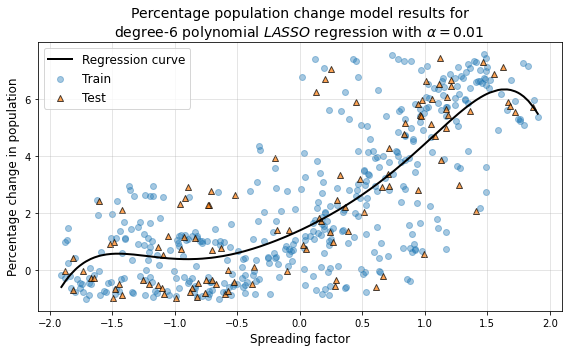

MSE for our degree-6 best model fit to the entire training set is:

	Train	2.5606
	Test	2.5973

Coefficients for this degree-6 LASSO regression model with alpha=0.01 are:

	Beta0	1.3897	
	Beta1	2.0463	
	Beta2	0.8527	
	Beta3	0.0000	  NOT SIGNIFICANT
	Beta4	0.2852	
	Beta5	-0.0351	  NOT SIGNIFICANT
	Beta6	-0.1212	


In [29]:
# your code here

best_deg = 6

#Compute the polynomial features for best degree
x_poly_train = PolynomialFeatures(
    best_deg, include_bias=include_bias
).fit_transform(x_train)
x_poly_test = PolynomialFeatures(
    best_deg, include_bias=include_bias
).fit_transform(x_test)

# Fit a linear regression model
lasso = Lasso(
    max_iter=max_iter,
    alpha = best_alpha,
    fit_intercept=fit_intercept,
)
lasso.fit(x_poly_train, y_train)

# Generate predictions
y_train_pred = lasso.predict(x_poly_train)
y_test_pred = lasso.predict(x_poly_test)

# Calculate and report train and test MSE
mse_train =  mean_squared_error(y_train, y_train_pred)
mse_test =  mean_squared_error(y_test, y_test_pred)

title = (
    "Percentage population change model results for\n"
    "degree-{} polynomial $LASSO$ regression with "
    "$\\alpha={}$".format(best_deg, best_alpha)
)
plot_predictions(df_train, df_test, y_train_pred, title)

print(
    f"MSE for our degree-{best_deg} best model fit to "
    f"the entire training set is:\n\n"
    f"\tTrain\t{mse_train:.4f}\n"
    f"\tTest\t{mse_test:.4f}\n"
)

# Save test MSE to results dictionary as required 
best_mse_dict["6.3"] = mse_test

# Report coefficients as required
print(
    f"Coefficients for this degree-{best_deg} LASSO"
    f" regression model with alpha={best_alpha} are:\n"
)

if fit_intercept==True:
    coefficients = [lasso.intercept_, *lasso.coef_]
else:
    coefficients = lasso.coef_

for i, coef in enumerate(coefficients):
    print(
        f"\tBeta{str(i)}\t{coef:.4f}"
        f"\t{'  NOT SIGNIFICANT' if np.abs(coef)<=0.1 else ''}"
    )

<div class='exercise-r'>

**6.4 What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.3 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.3 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.3 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?

</div>

*your answer here*

In Question 5, using cross-validated OLS regression on 100 bootstrapped samples, we identified degree-8 as our "best degree" model. Now however, using cross-validated $LASSO$ regularized regression with $\alpha=0.01$ on 100 boostrapped samples, we have instead selected degree-6 as our "best degree" model. As can be seen in the plot above, our degree-6 model presents a smoother overall curve than the degree-8 model in Question 5. **This degree-6 regression curve gives the impression that our model better matches the general underlying relationship between our predictor and response variables, and the curve appears to be less influenced by noise, particularly at very extreme values of $X$.** 

**The test $MSE$ for our degree-6 model ($MSE=$ 2.597) also supports these observations. It is slightly lower than that of our degree-8 model's test $MSE$ (2.613), and our degree-6 test $MSE$ is closer to our degree-6 train $MSE$ (2.561) than was seen with our degree-8 train $MSE$ (2.513).** This suggests that we have reduced variance in our model, albeit slightly.

The greater benefit we might expect to come from our degree-6 model is derived from the method by which we arrived at this "best degree" model choice. Whereas in prior models when intepreting our results, we had noted the increasingly involved steps taken to mitigate for the effect of random variability in our selection process (with the hopes of arriving at a more "robust" final model choice), this model's selection process takes the very powerful additional step of applying regularization to our regression coefficients. **By using cross-validation to first select our regularization parameter $\alpha$, and then bootstrapping to test for meaningfully significant degree-coefficients, we have sought to reduce the effect of random variability on our selection for both of these hyper-parameters ($\alpha$ and $n$-degrees). On top of that, we have applied regularization to discourage extreme values in our model parameters $\beta_i$. For these reasons, we could probably expect this degree-6 model to be more "reliable" or robust than our previous "best degree" models when presented with new unseen data.**

One of the more interesting observations to note in our results above, has to do with the degree coefficients in our degree-6 model. **Not even all six of the coefficients in our final model have been found to be significant at our $\mid \beta_i\mid > 0.1$ threshold.** For instance, degree-3 has a coefficient value that has shrunken to $\beta_3=0.0000$. This is particularly interesting to consider relative to our bootstrapped 95% confidence intervals for $\beta_3$ in Question 2.2. There we found $\beta_3=0$ to be within our 95% CI bounds, indicating  that there was a very low probability of an actual degree-3 relationship between spreading factor and our response variable "percentage change". Here, our $LASSO$ regularized regression model is effectively telling us the same thing. In addition to $\beta_3$, the $\beta_5$ coefficient is also below our $\mid \beta_i\mid > 0.1$ threshold. This is not surprising, considering the low frequency with which this coefficient was identified as significant during our Question 6.2 bootstraps. This indicates that our degree-5 relationship between spreading factor and percentage change is relatively weak.

<a id="part7"></a>

## <div class='exercise'>Question 7: Analyze your best test MSEs for each sub section of the homework [6 pts]</div> 

[Return to contents](#contents)


**7.1** Convert the `best_mse_dict` dictionary used to store the best $MSE$ values from each section of the homework into a Pandas dataframe. Generate a bar plot illustrating the $MSE$ values in that dataframe and also display the resulting dataframe.

**7.2** Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

<a id="part7solutions"></a>

## Question 7: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**7.1** Convert the `best_mse_dict` dictionary used to store the best $MSE$ values from each section of the homework into a Pandas dataframe. Generate a bar plot illustrating the $MSE$ values in that dataframe and also display the resulting dataframe.

</div>

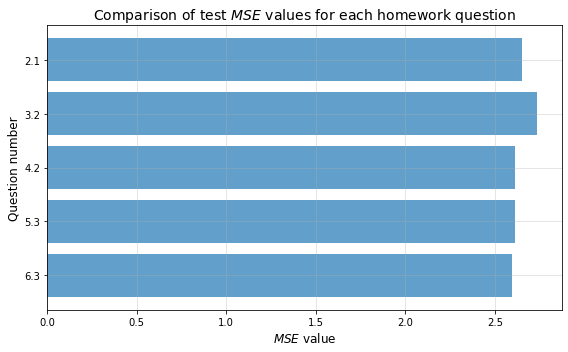

,Question,Test MSE
0,2.1,2.651906
1,3.2,2.736483
2,4.2,2.613011
3,5.3,2.613011
4,6.3,2.597304


In [30]:
# your code here

# Generate dataframe directly from best_mse_dict
df_mse = pd.DataFrame.from_dict(
    best_mse_dict, orient="index"
).reset_index()

# Add meaningful column names to dataframe
df_mse.columns = ["Question", "Test MSE"]

# Generate barplot as required
fig, ax = plt.subplots(figsize = (8,5))
ax.barh(
    df_mse["Question"].values[::-1],
    df_mse["Test MSE"].values[::-1],
    alpha=0.7,
)
# ax.set_xlim([2.5,2.8])
ax.set_ylabel("Question number",fontsize =12)
ax.set_xlabel("$MSE$ value", fontsize=12)
ax.set_title(
    "Comparison of test $MSE$ values for each homework question",
    fontsize=14
)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show()

# Display dataframe as required
display(df_mse)

<div class='exercise-r'>

**7.2** Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

</div>

*your answer here*

**We have chosen to select our Question 6.3 degree-6 $LASSO$ regularized model as our best model. Not only does it have the lowest test $MSE$ of all "best degree" models shown here, but we also believe it to be the most "reliable" or robust model for the reasons described in our Question 6.4 written interpretation.** The only major drawbacks we see related to this model are (1) the computational complexity (and time) that was required to arrive at our Question 6.3 "best degree" value, and (2) the potential risk presented by our model's failure to converge to an "optimal" solution, even with our maximum iterations increased to 100,000. Even then, our approach was not computational prohibitive (it took only 6 minutes to run on a mid-range laptop), and our resulting model performs well on our test set while also appearing to be a favorable compromise between flexibility and simplicity based on the results we have compared throughout this notebook.

#### THE END